In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/Vehicle Sales Data.xlsx')

In [ ]:
df.head()

,Vehicle Full Code,Vehicle Code,OEM Model Name,SIAM Company Code,SIAM Segment 1,SIAM Segment 2,SIAM Fuel,Month,Year,Production Qty,Domestic Sale,Export Sale,Category,Category Name,YrMth
0,HMPVF2U4DI,PV,PAJRO SFX,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,01-11-2012
1,HMORF2U4DI,OR,OUTLANDER,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,01-11-2012
2,SKOAP3EEDI,OA,Octavia,SKODAAUTO INDIA PVT LTD,Premium Car 3,Executive,DIESEL,NOV,2012,0,0,0,PVPC,Passenger car PV,01-11-2012
3,HMORF2U4PT,OR,OUTLANDER,HINDUSTAN MOTORS LTD,SUV,UV4:,PETROL,NOV,2012,0,6,0,PVUV,Utility vehicles PV,01-11-2012
4,FMTXF1U3PT,TX,Trax,FORCE MOTORS LTD,MPV,UV3,PETROL,MAY,2012,0,0,0,PVUV,Utility vehicles PV,01-05-2012


In [ ]:
df.columns

Index(['Vehicle Full Code', 'Vehicle Code', 'OEM Model Name',
       'SIAM Company Code', 'SIAM Segment 1', 'SIAM Segment 2', 'SIAM Fuel',
       'Month', 'Year', 'Production Qty', 'Domestic Sale', 'Export Sale',
       'Category', 'Category Name', 'YrMth'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19666 entries, 0 to 19665
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Vehicle Full Code  19666 non-null  object
 1   Vehicle Code       19666 non-null  object
 2   OEM Model Name     19666 non-null  object
 3   SIAM Company Code  19666 non-null  object
 4   SIAM Segment 1     19654 non-null  object
 5   SIAM Segment 2     19666 non-null  object
 6   SIAM Fuel          19648 non-null  object
 7   Month              19666 non-null  object
 8   Year               19666 non-null  int64 
 9   Production Qty     19666 non-null  int64 
 10  Domestic Sale      19666 non-null  int64 
 11  Export Sale        19666 non-null  int64 
 12  Category           18569 non-null  object
 13  Category Name      18569 non-null  object
 14  YrMth              19666 non-null  object
dtypes: int64(4), object(11)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,Year,Production Qty,Domestic Sale,Export Sale
count,19666.000000,19666.00000,19666.000000,19666.000000
mean,2015.257399,1262.62992,1126.482203,238.537628
std,2.290398,2957.78831,2667.334476,963.164029
min,2012.000000,-28.00000,-128.000000,0.000000
25%,2013.000000,0.00000,0.000000,0.000000
50%,2015.000000,35.00000,77.000000,0.000000
75%,2017.000000,950.75000,865.750000,1.000000
max,2019.000000,33128.00000,30499.000000,15088.000000


In [ ]:
df.isnull().sum()

Vehicle Full Code       0
Vehicle Code            0
OEM Model Name          0
SIAM Company Code       0
SIAM Segment 1         12
SIAM Segment 2          0
SIAM Fuel              18
Month                   0
Year                    0
Production Qty          0
Domestic Sale           0
Export Sale             0
Category             1097
Category Name        1097
YrMth                   0
dtype: int64

In [ ]:
#finding the duplicates
df['Category Name'].isnull().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Select relevant columns for modeling
columns = ['Month', 'Year', 'SIAM Segment 1', 'Category Name', 'Domestic Sale']
df = df[columns]


In [ ]:
df.head()

,Month,Year,SIAM Segment 1,Category Name,Domestic Sale
0,NOV,2012,SUV,Utility vehicles PV,0
1,NOV,2012,SUV,Utility vehicles PV,0
2,NOV,2012,Premium Car 3,Passenger car PV,0
3,NOV,2012,SUV,Utility vehicles PV,6
4,MAY,2012,MPV,Utility vehicles PV,0


In [ ]:
df.shape

(19666, 5)

In [ ]:
df['Month'].unique()

array(['NOV', 'MAY', 'JUN', 'SEP', 'OCT', 'AUG', 'DEC', 'APR', 'JUL',
       'MAR', 'FEB', 'JAN'], dtype=object)

In [ ]:
df['Year'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
# Encode categorical variables

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['SIAM Segment 1'] = encoder.fit_transform(df['SIAM Segment 1'])
df['Category Name'] = encoder.fit_transform(df['Category Name'])


In [ ]:
# Create a combined date column for time-based analysis
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))


In [ ]:
df['Date']


0       2012-11-01
1       2012-11-01
2       2012-11-01
3       2012-11-01
4       2012-05-01
           ...    
19661   2019-01-01
19662   2019-01-01
19663   2019-01-01
19664   2019-01-01
19665   2019-02-01
Name: Date, Length: 19666, dtype: datetime64[ns]

In [ ]:
# Sort the data by date
df = df.sort_values('Date')


In [ ]:
df.head()

,Month,Year,SIAM Segment 1,Category Name,Domestic Sale,Date
1571,APR,2012,5,0,1427,2012-04-01
1497,APR,2012,11,1,0,2012-04-01
1496,APR,2012,11,1,0,2012-04-01
1647,APR,2012,11,1,3,2012-04-01
1646,APR,2012,11,1,0,2012-04-01


In [35]:
df.corr()

<ipython-input-35-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,SIAM Segment 1,Category Name,Domestic Sale
Year,1.000000,0.069994,0.233703,0.100199
SIAM Segment 1,0.069994,1.000000,0.613219,-0.146996
Category Name,0.233703,0.613219,1.000000,-0.057500
Domestic Sale,0.100199,-0.146996,-0.057500,1.000000


In [36]:
import seaborn as sns

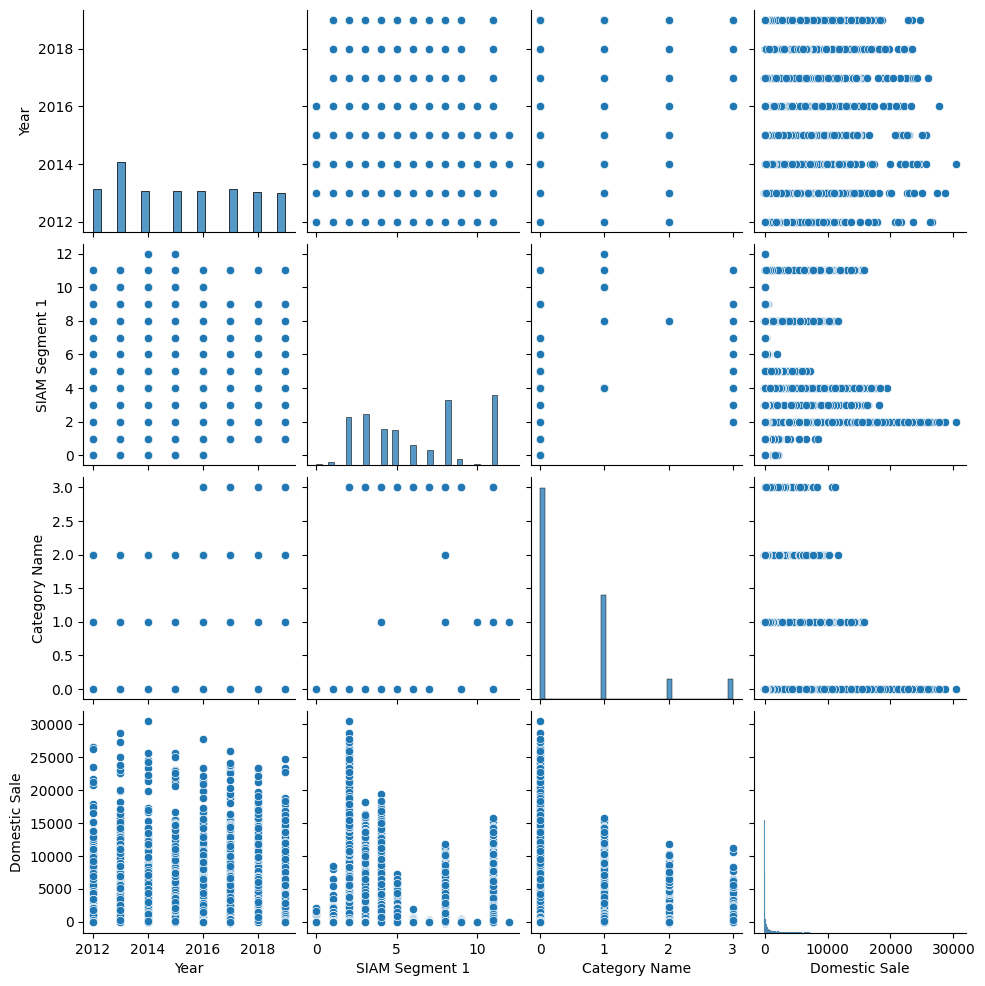

In [37]:
sns.pairplot(df)


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline


<ipython-input-39-9d8a697bf94d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


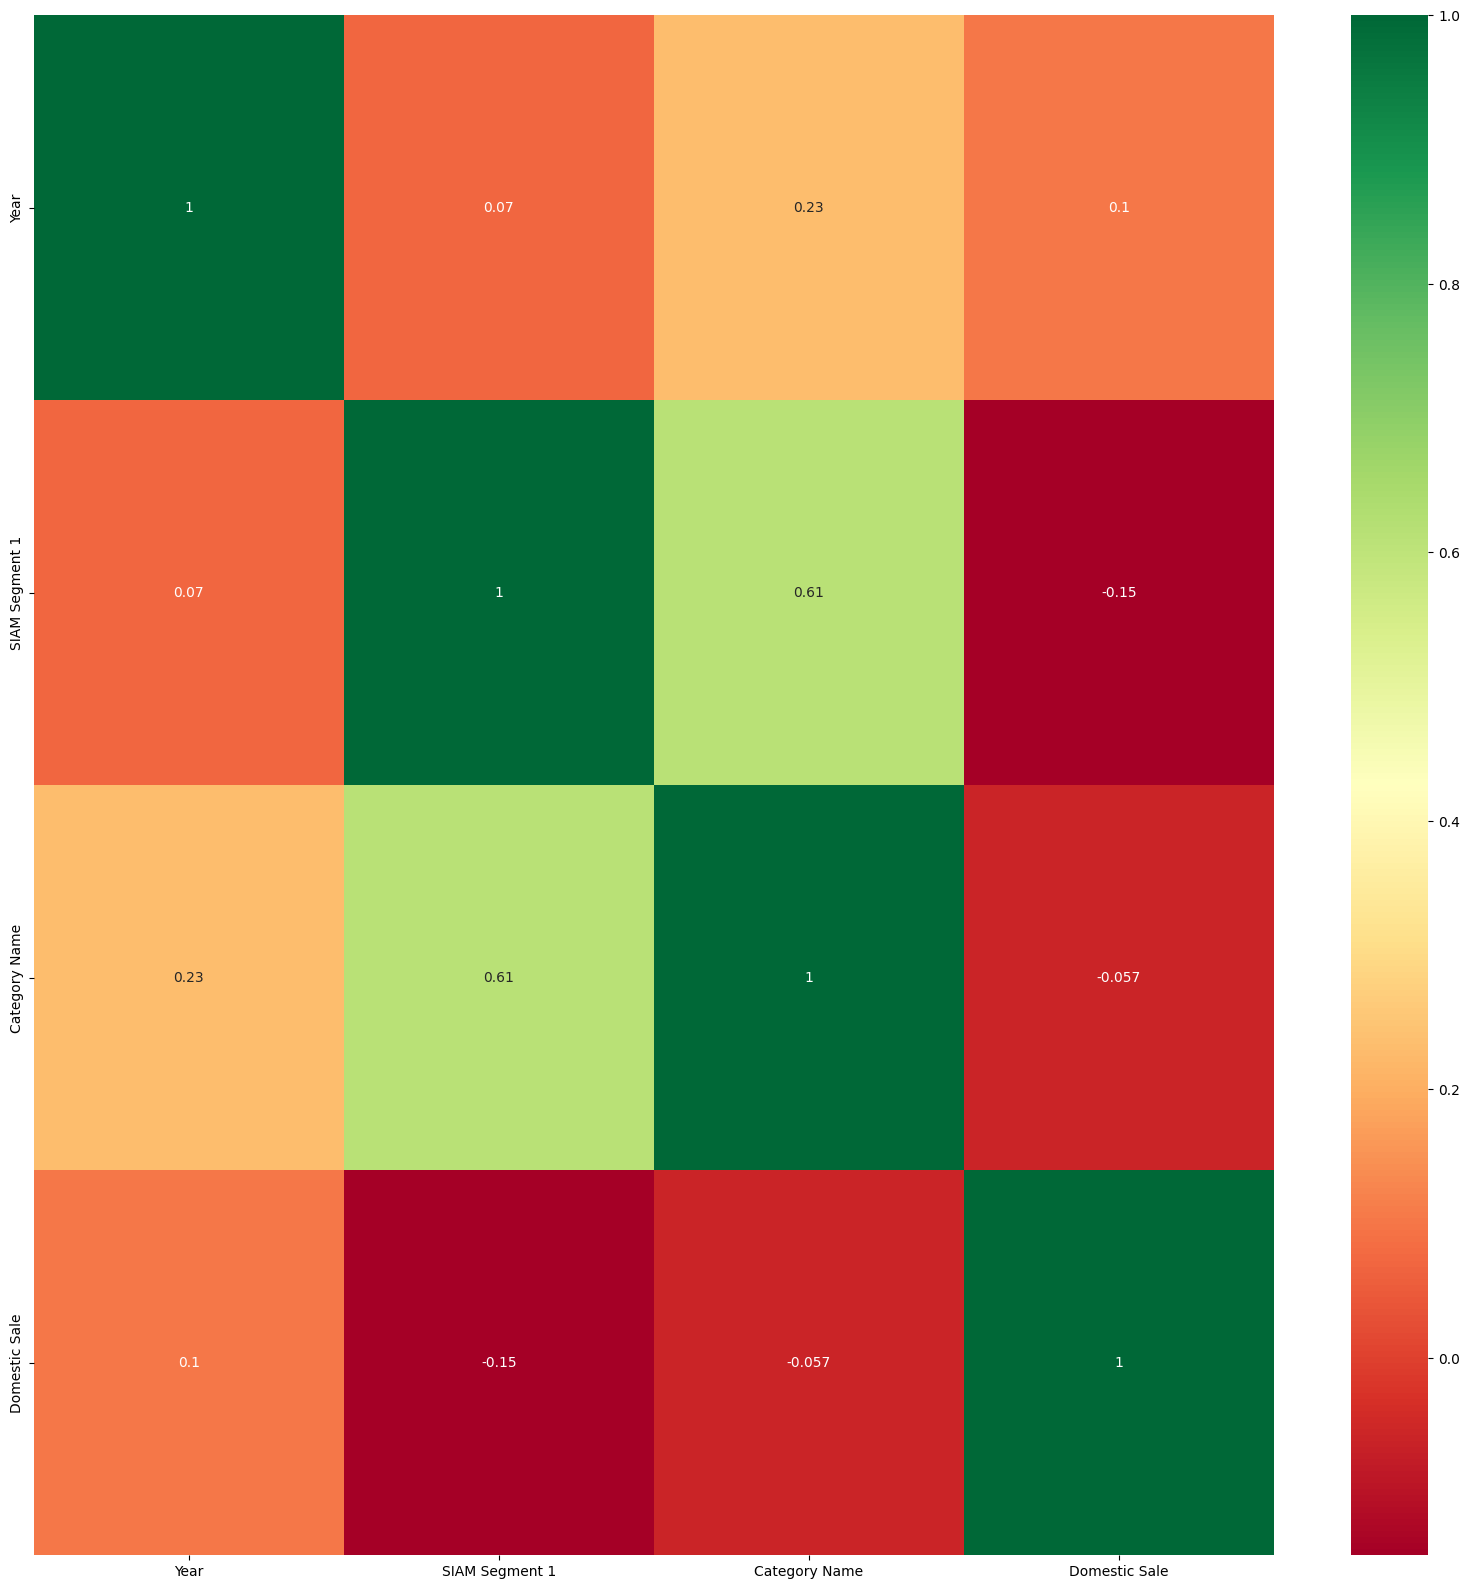

In [39]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# Split the data into training and testing sets
x = df[['SIAM Segment 1', 'Category Name']]
y = df['Domestic Sale']



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
# Initialize the model
lr = LinearRegression()

In [ ]:
# Train the model
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = lr.predict(x_test)


In [ ]:
# Calculate the root mean squared error (RMSE)

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)


RMSE: 2750.679852058921


Prediction of future sales

In [ ]:
# Create a dataframe for future dates
future_dates = pd.date_range(start=df['Date'].max(), periods=6, freq='M')
future_df = pd.DataFrame({'Date': future_dates})
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month



In [ ]:
future_dates

DatetimeIndex(['2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
future_df

,Date,Year,Month
0,2019-12-31,2019,12
1,2020-01-31,2020,1
2,2020-02-29,2020,2
3,2020-03-31,2020,3
4,2020-04-30,2020,4
5,2020-05-31,2020,5


In [ ]:
future_df['SIAM Segment 1'] = df['SIAM Segment 1']
future_df['Category Name'] = df['Category Name']

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [ ]:
# Encode categorical variables in the future dataframe
future_df['SIAM Segment 1'] = encoder.fit_transform(future_df['SIAM Segment 1'])
future_df['Category Name'] = encoder.fit_transform(future_df['Category Name'])



In [ ]:
# Make predictions on the future data
future_sales = lr.predict(future_df[['SIAM Segment 1', 'Category Name']])

In [ ]:
# Print the predicted sales for the next 6 months
print('Predicted Sales for the Next 6 Months:')
for date, sales in zip(future_dates, future_sales):
    print(date.strftime('%Y-%m'), ':', sales)


Predicted Sales for the Next 6 Months:
2019-12 : 1777.4638884532153
2020-01 : 1777.4638884532153
2020-02 : 1764.06925758396
2020-03 : 1777.4638884532153
2020-04 : 2065.4332408662713
2020-05 : 2065.4332408662713
